In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd
%matplotlib inline

# Introduction

Let us define a dataset 
$$
    \mathcal{D} = \{\mathbf{x}_n\}, \hspace{0.2cm} n \in \{1, \dots, N\}
$$
where $\mathbf{x}_i$ are m-vectors.

The $q$-principal axes $\mathbf{w}_j$ are orthonormal onto which 
the retained variance under the projection is maximized.

Sample covariance matrix
$$
    \mathbf{S} = \frac{1}{N - 1} \sum_{i = 1}^N (\mathbf{x} - \bar{\mathbf{x}})(\mathbf{x} - \bar{\mathbf{x}})^T
$$

We define $\eta_i$ to be the projected vectors. 
$$
    \eta_i = \mathbf{W}^T (\mathbf{x}_i - \bar{\mathbf{x}})
$$
where $\mathbf{W} = \{\mathbf{w}_1, \dots , \mathbf{w}_q\}$

The variable $\eta$ are uncorrelated such that the covariance 
$$
    \mathbf{S}_\eta = \frac{1}{N - 1}\sum_{i = 1}^N \eta_i \eta_i^T
$$
is diagonal with elements $\lambda_j$, the eigenvectors of $\mathbf{S
}$.

We set the optimal linear reconstruction 
$$
    \hat{\mathbf{x}}_i = \mathbf{W }\eta_i + \bar{\mathbf{x}}
$$
which will maximize the L2-error (or squared reconstruction error).

# Latent variable model

We use the factor analysis model
$$
    \mathbf{x} = \mathbf{W}\eta + \mu + \epsilon
$$
where we assume 
\begin{align}
    \eta &\sim \mathcal{N}(0, \mathbb{1}) \\
    \epsilon &\sim \mathcal{N}(0, \Sigma) \\
    \mathbf{x} &\sim \mathcal{N}(\mu, \mathbf{WW}^T + \Sigma)
\end{align}

Where we constrain $\Sigma$ to be diagonal. 
The observed variables $x_i$ are conditionally independent on the latent variables $\theta = (\eta, \mu, \Sigma)$.

# Probabilistic PCA

Using an isotropic Gaussian noise model $\Sigma = \sigma^2 \mathbf{1}$, we end up with the conditional distribution
$$
    \mathbf{x} \mid \eta \sim \mathcal{N}(\mathbf{Wx} + \mu, \sigma^2\mathbf{1})
$$

The corresponding log-likelihood is
$$
    \mathcal{L} = -\frac{N}{2} (d \log (2 \pi) + \log \det (C) +
    \text{Tr} (\mathbf{C}^{-1} \mathbf{S} ))
$$

where $\mathbf{C} = \mathbf{WW}^T + \sigma^2 \mathbf{1}$.

By Bayes rule, we can get the posterior
$$
    \eta \mid \mathbf{x} \sim \mathcal{N} (\mathbf{M}^{-1} \mathbf{W}^T (\mathbf{x} - \mu), \sigma^2 \mathbf{M}^{-1})
$$

where $\mathbf{M} = \mathbf{W}^T\mathbf{W} + \sigma^2 \mathbf{1}$. Using 
results from matrix differention, we get
$$
\frac{\partial \mathcal{L}}{\partial \mathbf{W}} = N(\mathbf{C}^{-1} \mathbf{S} \mathbf{C}^{-1} - \mathbf{C}^{-1} \mathbf{W})
$$
 There are 3 possible solution (2 non-trivial). The first one is 
 $$
         \mathbf{C} = \mathbf{S} \implies \mathbf{WW}^{T} = \mathbf{S} - \sigma^{2} \mathbf{1} 
 $$
 Therefore 
 $$
 \hat{\mathbf{W}}_{\text{ML}} = \mathbf{U} (\Lambda - \sigma^{2} \mathbf{1})^{1/2} \mathbf{R}
 $$
 Where $\mathbf{U}$ is the left projector operator 
 of the singular value decomposition of $\mathbf{S}$ and $\Lambda$ is eigenvalue 
 diagonal matrix. $\mathbf{R}$ is an arbitrary rotation matrix.
 
 The operator may be ranked reduce to include only non-zero eigenvalues. 
 
 From this maximum likelihood estimator, we get
$$ 
        \hat{\sigma}^2_{\text{ML}} = \frac{1}{m - q} \sum_{j=q + 1}^m \lambda_j
$$
which is the lost variance by the projection averaged over the lost dimension.


# An Expectation Maximization Algorithm for PPCA
In this approach, the latent variables $\theta$ are the *missing data*. 
The complete data likelihood is 
$$
    \mathcal{L}_C = \sum_{i = 1}^N \log (p( \mathbf{x}_i \mid \eta_i))
$$

From our previous definitions, this is
$$
    p( \mathbf{x}_i \mid \eta_i) = (2 \pi \sigma^2)^{-m/2} 
    \exp \left\{ - \frac{|| \mathbf{x}_i - \mathbf{W}\eta_i - \mu ||^2}{2 \sigma^2} \right\} 
        (2 \pi )^{-m/2}\exp \left\{ - \frac{||\eta_i||^2}{2}\right\}
$$

In the expectation step (E step), we take the expectation of $\mathcal{L}_C$ 
with respect to the distribution $p(\eta_i \mid \mathbf{x}_i, \mathbf{W}, \sigma^2)$

$$
    \langle \mathcal{L}_C\rangle = -
    \sum_{i = 1}^N \frac{m}{2} \log(\sigma^2) + 
    \frac{1}{2} \text{Tr} (\langle \eta_i \eta_i^T \rangle) 
    + \frac{1}{2 \sigma^{2}}(\mathbf{x}_i - \mu)^T(\mathbf{x}_i - \mu)
    - \frac{1}{\sigma^2} \langle \eta_i \rangle^T \mathbf{W}^T (\mathbf{x}_i - \mu) 
    + \frac{1}{2 \sigma^2} \text{Tr} (\mathbf{W}^T \mathbf{W} \langle \eta_i \eta_i^T \rangle )
$$

where 
\begin{align}
        \langle \eta_i \rangle &= \mathbf{M}^{-1} \mathbf{W}^{T} (\mathbf{x}_i - \mu) \\
        \langle \eta_i \eta_i^T \rangle &= \sigma^2 \mathbf{M}^{-1} + \langle \eta_i \rangle 
        \langle \eta_i \rangle^{T} \\
        \mathbf{M} &= \mathbf{W}^{T} \mathbf{W} + \sigma^2 \mathbf{1}
\end{align}
These values are computed using the fixed statistics $\mathbf{W}$ and $\sigma^2$.

In the maximization step (M-step), $\langle \mathcal{L}_C \rangle$ is maximized with respect 
to $\mathbf{W}$ and $\sigma^{2}$ given
$$
\tilde{\mathbf{W}} =  \left( \sum_{i = 1}^N (\mathbf{x_i} - \mu) \langle \eta_i \rangle^T \right)
\left( \sum_{i = 1}^N \langle \eta_i \eta_i^T \rangle \right)^{-1}
$$
and 
$$
\tilde{\sigma}^{2} = \frac{1}{N m} \sum_{i=1}^{N} ||\mathbf{x}_i - \mu||^2 
        - 2\langle \eta_i \rangle^T \tilde{\mathbf{W}}^T (\mathbf{x}_i - \mu) 
        + \text{Tr}(\langle \eta_i \eta_i^T\rangle \tilde{\mathbf{W}}^T \tilde{\mathbf{W}})
$$


        



Text(0.5, 1.0, 'Multivariate Gaussian')

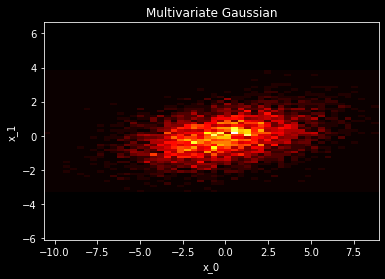

In [251]:
# Dataset
N = 5000
m = 2    # data dimension
q = 1    # latent dimension for 
variance = 0.5

plt.style.use("dark_background")
true_mean = [0, 0]
true_cov = [[8, 1], [1, 1]]  # positive semi-definite and symettric matrix
data = np.random.multivariate_normal(true_mean, true_cov, size=N)
plt.hist2d(data[:, 0], data[:, 1], cmap="hot", bins=50)
plt.axis("equal")
plt.xlabel(r"x_0")
plt.ylabel(r"x_1")
plt.title("Multivariate Gaussian")

In [409]:
def stacked_lstsq(L, b, rcond=1e-10):
    """
    Solve L x = b, via SVD least squares cutting of small singular values
    L is an array of shape (M, N) and b of shape (..., M).
    Returns x of shape (..., N)
    """
    u, s, v = np.linalg.svd(L, full_matrices=False)
    s_max = s.max(axis=-1, keepdims=True)
    s_min = rcond*s_max
    inv_s = np.zeros_like(s)
    inv_s[s >= s_min] = 1/s[s>=s_min]
    x = np.einsum('ji,...j-> ...i', v, inv_s * np.einsum('ji,...j->...i', u, b))
    return x



def probabilistic_pca(data, q, method="mle", epsilon=1e-6):
    
    # initialization
    m = data.shape[1]
    
    if method == "mle":

        # empirical mean
        mu_hat = np.mean(data, axis=0)

        # empirical covariance
        xi = data - mu_hat[np.newaxis, :]
        sigma_hat = np.mean(np.einsum("...i, ...j -> ...ij", xi, xi), axis=0)

        u, lam, _ = svd(sigma_hat)

        # sufficient statistics
        if q < m:
            variance_hat = np.mean(lam[q:])  # variance lost in the projection
            lam[q:] = variance_hat           # principal eigenvalues unchanged
            u_q = u[:, :q]                   # projector to principal space
        elif q == m:
            variance_hat = 0
            u_q = u

        # compute square root via svd
        A = (np.eye(m) * lam - np.eye(m) * variance_hat)
        v, d, v_inv = svd(A)
        A_sq = v_inv @ (np.eye(m) * d**(1/2)) @ v
        
        # ML estimator of weight matrix
        W = u_q.T @ A_sq
    
    # optimize for the variance sigma and weight matrix
    if method == "em":

        def expected_log_likelihood(exp_eta, exp_eta_cov, var, W):
#             xi = data - mu[np.newaxis, :] # gotten from outside namescope
            
            out = N * m /2 * np.log(var)
            out += np.sum(np.einsum("...ii -> ...", exp_eta_cov))/2
            out += np.sum(np.einsum("...i, ...i -> ...", xi, xi))/2/var
            out -= np.sum(np.einsum("...i, ...i -> ...", exp_eta, np.einsum("ij, ...i -> ...j", W, xi)))/var
            w_cov =  np.einsum("ij, ...jk -> ...ik", W, exp_eta_cov)
            ww_cov = np.einsum("ji, ...jk -> ...ik", W, w_cov)
            trace = np.einsum("...ii -> ...", ww_cov)
            out += np.sum(trace)/2/var
            return -out
        
        # estimate mu from data
        mu_hat = np.mean(data, axis=0)
        xi = data - mu_hat[np.newaxis, :]
        
        expectation_last = -np.inf    # start expectation at the lowest possible value
        best_expectation = -np.inf    # set a record for the space search
    
        max_iter = 1000               # set a maximum iteration limit
        n_try = 1                     # explore the landscape to search for global maxima
        # as it turns out, one iteration is fine.
        
        for epoch in range(n_try):
            # initialize latent variable at a random point in the parameter space
            W_tilde = np.random.normal(0, 1, size=(m, q))
            var_tilde = np.random.normal(0, 1)**2
            for i in range(1000):
                # Expectation step
                M = W_tilde.T @ W_tilde + np.eye(q) * var_tilde   # (q, q) matrix
                M_inv = np.linalg.inv(M)
                exp_eta = np.einsum("ij, ...j -> ...i", M_inv, np.einsum("ji, ...j -> ...i",  W_tilde, xi))
                exp_eta_cov = (M_inv * var_tilde)[np.newaxis, :, :] + np.einsum("...i, ...j -> ...ij", exp_eta, exp_eta)

                # Maximization step
                cov_norm = np.linalg.inv(np.sum(exp_eta_cov, axis=0))
                W_tilde = np.sum(np.einsum("...i, ...j -> ...ij", xi, exp_eta), axis=0) @ cov_norm
                var_tilde = np.sum(xi**2)
                var_tilde -= 2 * np.sum(np.einsum("...i, ...i -> ...", exp_eta, np.einsum("ij, ...i -> ...j", W_tilde, xi)))
                var_tilde += np.sum(np.einsum("...ii", np.einsum("...ij, jk -> ...ik", exp_eta_cov , W_tilde.T @ W_tilde)))
                var_tilde /= m * N


                expectation = expected_log_likelihood(exp_eta, exp_eta_cov, var_tilde, W_tilde)
                if expectation <= expectation_last + epsilon:
                    break
                expectation_last = expectation
            
            print(expectation)
            if expectation > best_expectation:
                # update our best parameters
                W = W_tilde
                var = var_tilde
                best_expectation = expectation

        
        # W span the principal subspace: it's ok that the principal component are not orthogonal
        u = W
        
    def sample_data(N):
        eta = np.random.multivariate_normal(mean=[0]*q, cov=np.eye(q), size=N)
        return np.einsum("ij, ...j -> ...i", W, eta) + mu_hat[np.newaxis, :]
        
    
    def principal_component():
        return np.einsum("ji, ...j -> ...i", W, (data - mu_hat[np.newaxis, :]))
        
    return sample_data, principal_component, u


-9002.069606993362


Text(0.5, 1.0, 'Reconstructed samples')

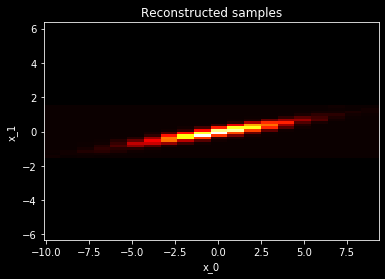

In [410]:
ppca = probabilistic_pca(data, 2, "em")

new_sample = ppca[0](N)
plt.hist2d(new_sample[:, 0], new_sample[:, 1], cmap="hot", bins=20)
plt.axis("equal")
plt.xlabel(r"x_0")
plt.ylabel(r"x_1")
plt.title("Reconstructed samples")


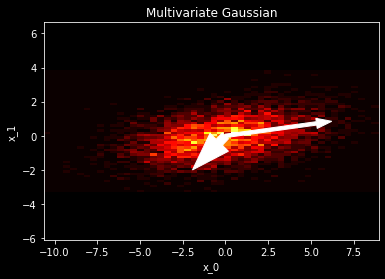

In [411]:
u1 = ppca[2][:, 0]
u2 = ppca[2][:, 1]
plt.hist2d(data[:, 0], data[:, 1], cmap="hot", bins=50)
plt.axis("equal")
plt.xlabel(r"x_0")
plt.ylabel(r"x_1")
plt.title("Multivariate Gaussian")
plt.arrow(0, 0, 2*u1[0], 2*u1[1], color="w", width=0.5)
plt.arrow(0, 0, 2*u2[0], 2*u2[1], color="w", width=0.2)